# Introduction to regression with Neural Networks in TensorFlow
Predicting numerical variable based on some other combination of variables.
Predicting a number

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

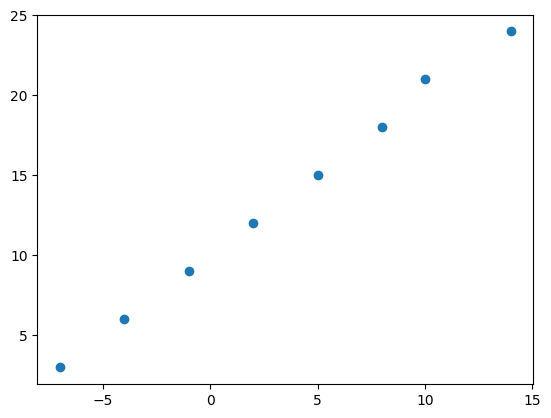

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 10.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True, False,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["living", "dining", "bedroom"])
house_price = tf.constant([90000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'living', b'dining', b'bedroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([90000], dtype=int32)>)

In [5]:
inp_shape = X.shape
out_shape = y.shape
inp_shape, out_shape

((8,), (8,))

In [6]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
# Turn numpy arrays to tensors
X, y = tf.constant(X), tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 10., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
inp_shape = X[0].shape
out_shape = y[0].shape
inp_shape, out_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers,
as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define loss function (tells the model how wrong it is)
and optimizer (tells the model how to improve the patterns it's learning)
and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting model try to find patterns between X and y (features and labels)


In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Alternative
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss = tf.keras.losses.mse, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent # optimizer tells our model how to improve
              metrics=["mae"])

# Fit the model
#model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=0)


In [10]:
# Make prediction using our model
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[27.58783]], dtype=float32)

## Improving our model
Improve model by altering the steps we took to create the model.
1. **Creating a model** - add more layers, increase the number of hidden units(neurons)
2. **Compiling a model** - change the optimization or learning rate
and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - fit model for more epochs

In [11]:
# Re build the model
# Create
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
    ])
# Compile
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(),
              # optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10, verbose=0)
# Predict

In [12]:
# Predict
X, y
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[27.570831]], dtype=float32)

In [13]:
# Let's change some more

# Create a model with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [14]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[34.19079]], dtype=float32)

In [15]:
# Let's change some more

# Create a model with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [16]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[27.199312]], dtype=float32)

## Evaluating a model
Build a model --> fit --> evaluate --> tweak --> fit and repeat

# Visualize
* The data: What data are we working with
* The model: What the model looks like
* Training: How does a model perform while learning
* Predictions: How does it line up


In [17]:
# Make a bigger data set
X = tf.range(-300, 300, 12)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-300, -288, -276, -264, -252, -240, -228, -216, -204, -192, -180,
       -168, -156, -144, -132, -120, -108,  -96,  -84,  -72,  -60,  -48,
        -36,  -24,  -12,    0,   12,   24,   36,   48,   60,   72,   84,
         96,  108,  120,  132,  144,  156,  168,  180,  192,  204,  216,
        228,  240,  252,  264,  276,  288], dtype=int32)>

In [18]:
# Make labels for the dataset
y = X + 30
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-270, -258, -246, -234, -222, -210, -198, -186, -174, -162, -150,
       -138, -126, -114, -102,  -90,  -78,  -66,  -54,  -42,  -30,  -18,
         -6,    6,   18,   30,   42,   54,   66,   78,   90,  102,  114,
        126,  138,  150,  162,  174,  186,  198,  210,  222,  234,  246,
        258,  270,  282,  294,  306,  318], dtype=int32)>

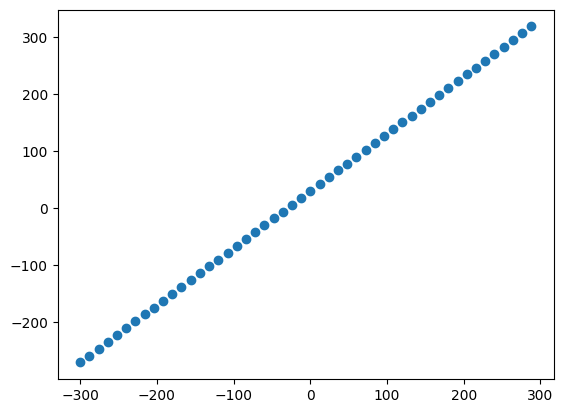

In [19]:
# Visualize
plt.scatter(X, y)

In [20]:
# import sklearn
# from sklearn.model_selection import train_test_split

# Check the length
len(X)

50

In [21]:
# Split into train and test
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]
len(X_train), len(X_test)
len(y_train), len(y_test)

(40, 10)

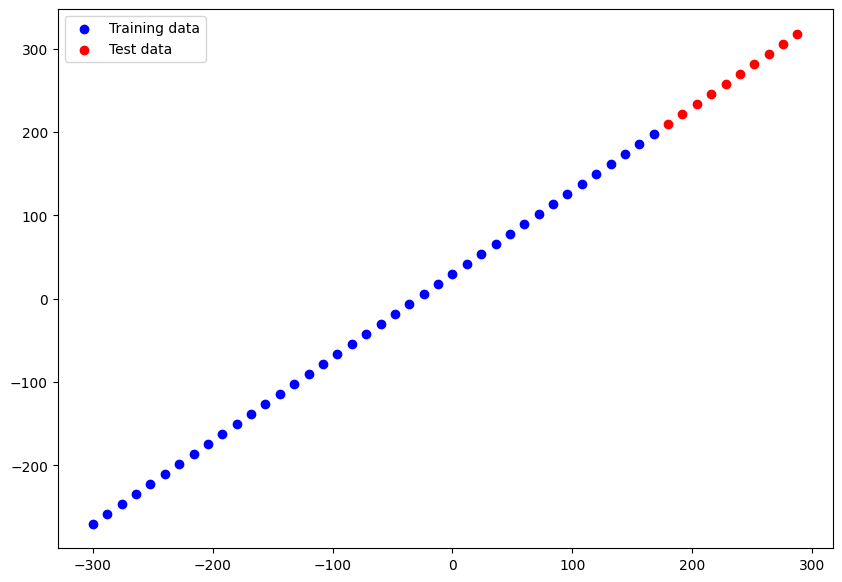

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="r", label="Test data")
plt.legend();

In [23]:
# Buulding again!
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10, verbose=2)

Epoch 1/10
2/2 - 1s - 292ms/step - loss: 78.3907 - mae: 78.3907
Epoch 2/10
2/2 - 0s - 68ms/step - loss: 66.6004 - mae: 66.6004
Epoch 3/10
2/2 - 0s - 29ms/step - loss: 53.1302 - mae: 53.1302
Epoch 4/10
2/2 - 0s - 29ms/step - loss: 46.8276 - mae: 46.8276
Epoch 5/10
2/2 - 0s - 70ms/step - loss: 54.7214 - mae: 54.7214
Epoch 6/10
2/2 - 0s - 30ms/step - loss: 49.7667 - mae: 49.7667
Epoch 7/10
2/2 - 0s - 68ms/step - loss: 50.2605 - mae: 50.2605
Epoch 8/10
2/2 - 0s - 31ms/step - loss: 50.7542 - mae: 50.7542
Epoch 9/10
2/2 - 0s - 38ms/step - loss: 52.5937 - mae: 52.5937
Epoch 10/10
2/2 - 0s - 33ms/step - loss: 46.3639 - mae: 46.3639


In [24]:
model.build()

## Visualizing our model

In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
# # Create a model which builds automatically by defining the input_shape argument
# tf.random.set_seed(42)

# # Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape=[1])
# ])
# # Compile
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])


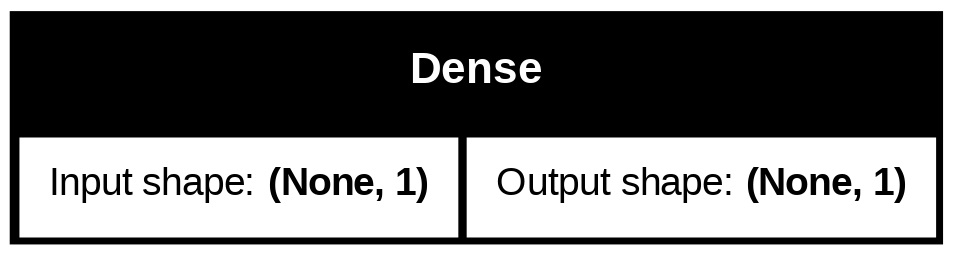

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Vizualizing our model's predictions
Plot them against ground truth vs the model's predictions
`y_test` or `y_true` vs `y_preds`

In [28]:
y_preds = model.predict(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [29]:
# Create a plotting function
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend();




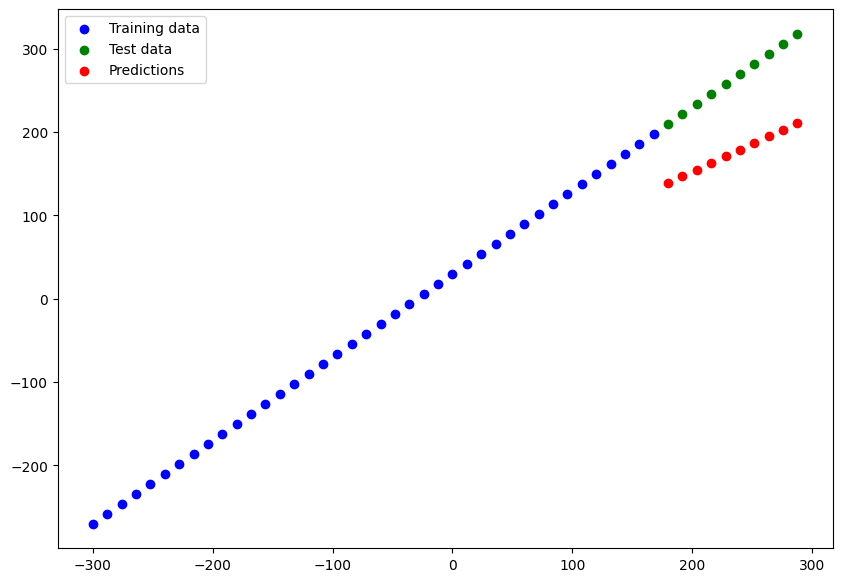

In [30]:
plot_preds(train_data=X_train,
           train_labels=y_train,
           test_data=X_test,
           test_labels=y_test,
           predictions=y_preds)

### Evaluating our model's predictions with regression evaluation metrics
* **MAE**
* **MSE** : When large errors are more significant than smaller errors

In [31]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 108.8875 - mae: 108.8875


[108.88749694824219, 108.88749694824219]

In [32]:
# Calculate the mean absolute error
mae = tf.keras.losses.MeanAbsoluteError()
mae_loss = mae(y_test, y_preds)
mae_loss

<tf.Tensor: shape=(), dtype=float32, numpy=89.00872802734375>

In [33]:
# Not needed
# tf.squeeze(y_preds)

In [34]:
# # Calculate again
# mae = tf.keras.losses.MeanAbsoluteError()
# mae_loss2 = mae(y_test, tf.squeeze(y_preds))

In [35]:
# mae_loss2

In [36]:
# mse = tf.keras.losses.MeanSquaredError()
# mse_loss = mse(y_test, y_preds)
# mse_loss

In [37]:
# Function
def meanae(y_true, y_preds):
  return tf.keras.losses.MeanAbsoluteError()(y_true, y_preds)
def meanse(y_true, y_preds):
  return tf.keras.losses.MeanSquaredError()(y_true, y_preds)

### Running experiments to improve our model
1. Get more data for the model to train on
2. Make your model larger (more layers/hidden units)
3. Train for longer

Let's do 3 experiments:
1. `model_1`: 1 layered model trained for 100 epochs
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs

**Build model_1**

In [38]:
# Set the random seed
tf.random.set_seed(42)

# Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


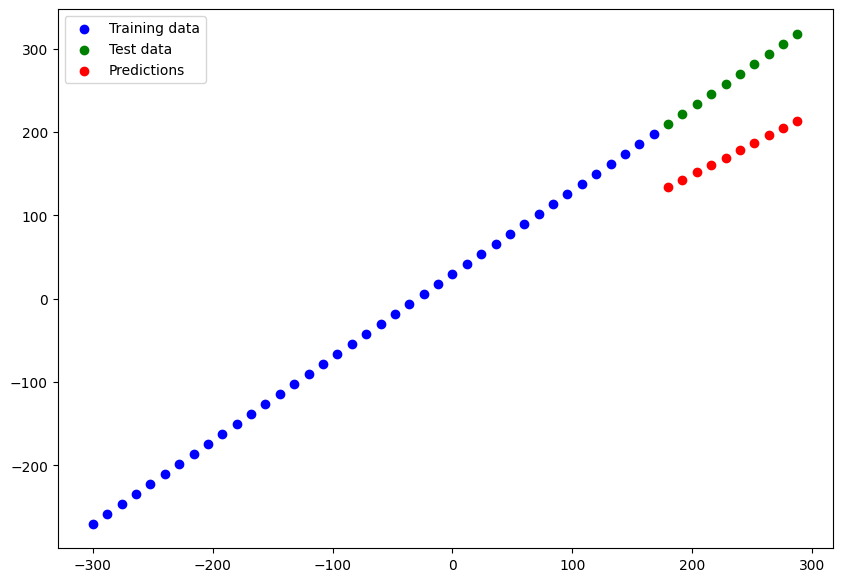

In [39]:
# Make and plot predictions for 'model_1'
y_preds_1 = model_1.predict(X_test)
plot_preds(predictions=y_preds_1)

In [40]:
# Calculate the prediction_metrics
mae_1 = meanae(y_test, y_preds_1)
mse_1 = meanse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=90.2398452758789>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8223.564453125>)

In [41]:
# Creating model_2
# Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 2s - 1s/step - loss: 138.3894 - mse: 78563.6094
Epoch 2/100
2/2 - 0s - 71ms/step - loss: 115.2444 - mse: 18982.6641
Epoch 3/100
2/2 - 0s - 43ms/step - loss: 138.3183 - mse: 28112.5312
Epoch 4/100
2/2 - 0s - 70ms/step - loss: 38.4491 - mse: 3521.5105
Epoch 5/100
2/2 - 0s - 102ms/step - loss: 85.9086 - mse: 13768.4375
Epoch 6/100
2/2 - 0s - 52ms/step - loss: 116.3223 - mse: 18402.9961
Epoch 7/100
2/2 - 0s - 136ms/step - loss: 82.6446 - mse: 23931.2461
Epoch 8/100
2/2 - 0s - 60ms/step - loss: 114.1048 - mse: 17733.6719
Epoch 9/100
2/2 - 0s - 62ms/step - loss: 39.3462 - mse: 3497.8425
Epoch 10/100
2/2 - 0s - 135ms/step - loss: 86.0263 - mse: 14216.4277
Epoch 11/100
2/2 - 0s - 69ms/step - loss: 116.1946 - mse: 18363.9531
Epoch 12/100
2/2 - 0s - 37ms/step - loss: 78.8813 - mse: 21666.3418
Epoch 13/100
2/2 - 0s - 72ms/step - loss: 114.4111 - mse: 17824.8340
Epoch 14/100
2/2 - 0s - 50ms/step - loss: 26.3625 - mse: 1042.2135
Epoch 15/100
2/2 - 0s - 89ms/step - loss: 182.4090 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


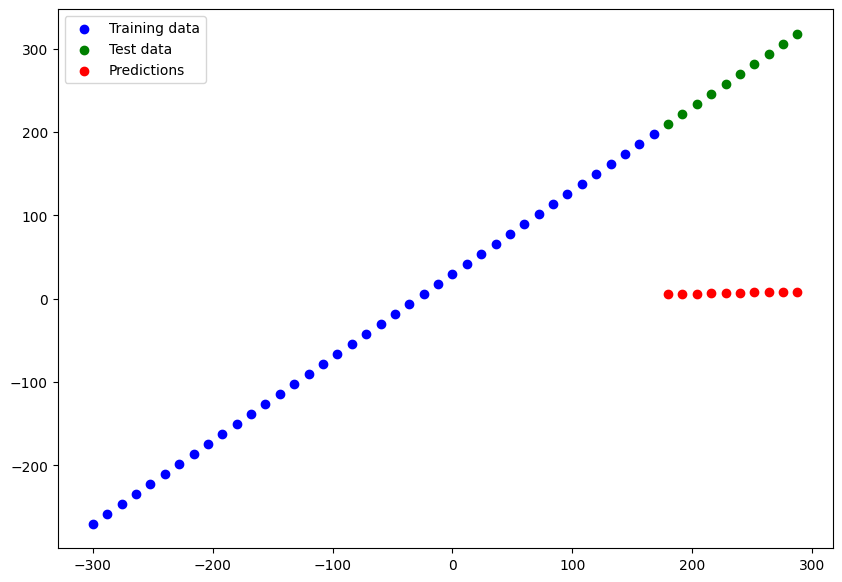

In [42]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_preds(predictions=y_preds_2)

In [43]:
# Calculate model_2 evaluation metrics
mae_2 = meanae(y_test, y_preds_2)
mse_2 = meanse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=256.9691162109375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=67154.640625>)

In [44]:
# Building model_3
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


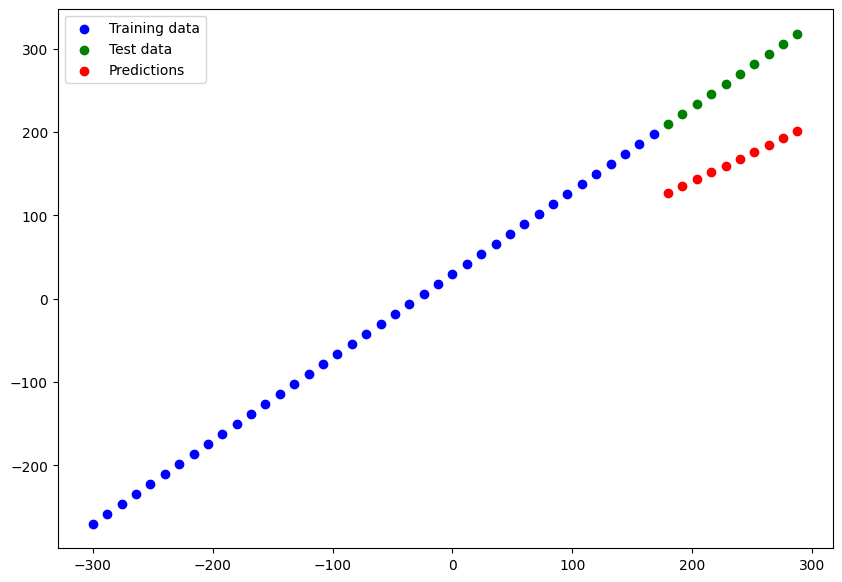

In [45]:
y_preds_3 = model_3.predict(X_test)
plot_preds(predictions=y_preds_3)

In [46]:
# Evaluation metrics
mae_3 = meanae(y_test, y_preds_3)
mse_3 = meanse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=99.95986938476562>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10103.7021484375>)

In [47]:
# Comparing the results using pandas
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=
                           ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,90.239845,8223.564453
1,model_2,256.969116,67154.640625
2,model_3,99.959869,10103.702148


In [48]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking your experiments
* TensorBoard
* Weights & Biases

### Saving our models
2 Formats
1. SavedModel Format
2. HDF5 form

In [52]:
# Save it using the SavedModel format
model_2.save("model_2_SavedModel_format.keras")

In [51]:
# Save using HDF5
model_2.save("model_2_HDF5_format.h5")

## Loading back our saved model

In [54]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("model_2_SavedModel_format.keras")
loaded_SavedModel_format.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (68.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9 (40.00 B)

In [55]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [56]:
# Compare model_2 predictions with loaded_SavedModel_format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# Load in HDF5 model
loaded_h5_model = tf.keras.models.load_model("model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
# Check if predictions are same for h5 one
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
# # Download file from colab
# from google.colab import files
# files.download("filename")

## A larger example

In [61]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
# One hot encode our dataframe so it's all numbers
insurance_dummies = pd.get_dummies(insurance, dtype="int")
insurance_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [69]:
# Create X and y values
X = insurance_dummies.drop("charges", axis=1)
y = insurance_dummies["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [70]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [71]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_test), len(X_train)

(1338, 268, 1070)

In [79]:
# Building a model
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10242.3896 - mae: 10242.3896
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7664.0464 - mae: 7664.0464
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7545.4834 - mae: 7545.4834
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7366.3623 - mae: 7366.3623
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7486.4272 - mae: 7486.4272
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7913.9565 - mae: 7913.9565
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7313.2666 - mae: 7313.2666
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7318.2681 - mae: 7318.2681
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7549.5952 - mae: 7549.5952
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7282.0645 - mae: 7282.0645


In [75]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7966.5571 - mae: 7966.5571 


[7636.296875, 7636.296875]

Improving our model
1. Add an extra layer with more hidden units
2. Train for longer

In [80]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
34/34 - 1s - 42ms/step - loss: 13296.2207 - mae: 13296.2207
Epoch 2/100
34/34 - 0s - 4ms/step - loss: 13142.8594 - mae: 13142.8594
Epoch 3/100
34/34 - 0s - 4ms/step - loss: 12793.1973 - mae: 12793.1973
Epoch 4/100
34/34 - 0s - 4ms/step - loss: 12096.6494 - mae: 12096.6494
Epoch 5/100
34/34 - 0s - 3ms/step - loss: 10935.3535 - mae: 10935.3535
Epoch 6/100
34/34 - 0s - 4ms/step - loss: 9474.2246 - mae: 9474.2246
Epoch 7/100
34/34 - 0s - 3ms/step - loss: 8146.0767 - mae: 8146.0767
Epoch 8/100
34/34 - 0s - 5ms/step - loss: 7511.2139 - mae: 7511.2139
Epoch 9/100
34/34 - 0s - 5ms/step - loss: 7417.5386 - mae: 7417.5386
Epoch 10/100
34/34 - 0s - 8ms/step - loss: 7394.7681 - mae: 7394.7681
Epoch 11/100
34/34 - 0s - 5ms/step - loss: 7374.9824 - mae: 7374.9824
Epoch 12/100
34/34 - 0s - 8ms/step - loss: 7354.7812 - mae: 7354.7812
Epoch 13/100
34/34 - 0s - 4ms/step - loss: 7334.1260 - mae: 7334.1260
Epoch 14/100
34/34 - 0s - 4ms/step - loss: 7313.2559 - mae: 7313.2559
Epoch 15/100
34/34

In [81]:
# Evaluate
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4999.1660 - mae: 4999.1660  


[4851.51220703125, 4851.51220703125]

In [82]:
# Set random seed
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13259.5303 - mae: 13259.5303
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13112.7812 - mae: 13112.7812
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12818.0684 - mae: 12818.0684
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12227.8711 - mae: 12227.8711
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11191.2070 - mae: 11191.2070
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9766.2705 - mae: 9766.2705
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8335.7119 - mae: 8335.7119
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7517.2910 - mae: 7517.2910
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7379.0923 - mae: 7379.0923
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7351.8433 - mae: 7351.8433
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7330.8945 - mae: 7330.8945
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [84]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3470.0803 - mae: 3470.0803  


[3403.4521484375, 3403.4521484375]

Text(0.5, 0, 'epochs')

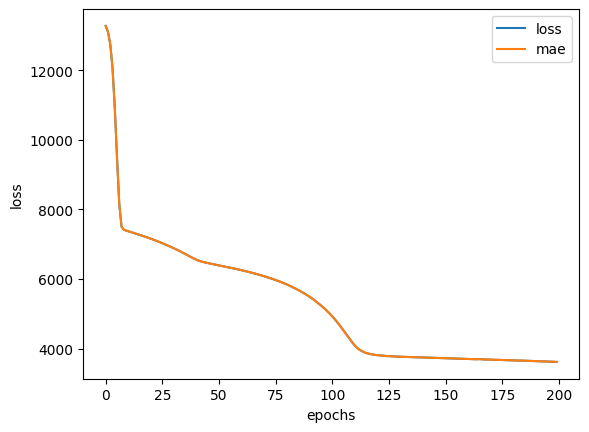

In [83]:
# Plot history (also known as loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<Axes: ylabel='Frequency'>

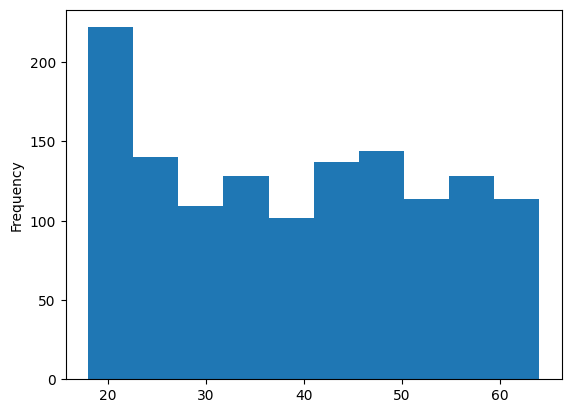

In [85]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

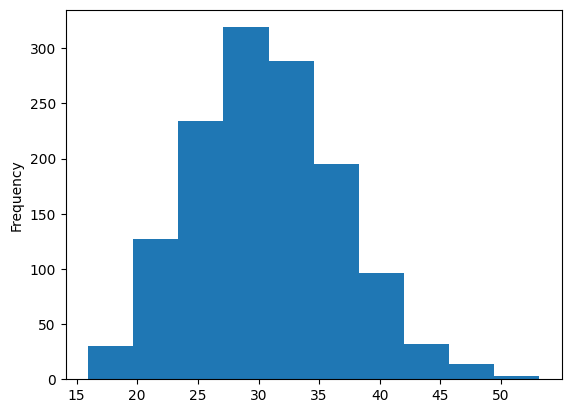

In [86]:
X['bmi'].plot(kind='hist')

## Preprocessing data (normalization and standardization)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we need a few classes from scikit learned_unigram_candidate_sampler

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

""" Create a column transformer: Here we normalize our numerical data and
one hot encode our categorical data """

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data:
""" If we have any kind of column transformer, we should fit it to
our training data and use that fit column transformer to transform our test data,
i.e fit it 2 different times on train and test and not at once, i.e ct.fit(X).
So if we're transforming our training data set with information from the test data set, it's like taking
knowledge from the future and altering the data that we have now.
So let's go here so that don't fit on X train.
"""
ct.fit(X_train)

# Transform training and test data with normalization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [90]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [94]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [95]:
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.2207 - mae: 13297.2207
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13288.7031 - mae: 13288.7031
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13267.6748 - mae: 13267.6748
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13222.7471 - mae: 13222.7471
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13141.9756 - mae: 13141.9756
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13014.1426 - mae: 13014.1426
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12828.9893 - mae: 12828.9893
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12576.5498 - mae: 12576.5498
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12247.2959 - mae: 12247.2959
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11836.9346 - mae: 11836.9346
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11357.8438 - mae: 11357.8438
Epoch 12/100
34/34 ━━━━━━━━━━━

In [96]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3516.2268 - mae: 3516.2268  


[3430.640380859375, 3430.640380859375]